In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("C:/Users/Hp/OneDrive/Desktop/Healthcare Insides Dasbord project 1.xlsx")
df.head()


,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20 00:00:00,5.0,13234,11910.6
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16 00:00:00,4.0,12241,11016.9
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15 00:00:00,5.0,35255,31729.5
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19 00:00:00,5.0,6582,5923.8
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06 00:00:00,4.9,4567,4110.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               7157 non-null   int64         
 1   Admit_Date               7157 non-null   datetime64[ns]
 2   Discharge_Date           7157 non-null   datetime64[ns]
 3   Diagnosis                7157 non-null   object        
 4   Bed_Occupancy            7157 non-null   object        
 5   Test                     7157 non-null   object        
 6   Doctor                   7157 non-null   object        
 7   Followup Date            7157 non-null   object        
 8   Feedback                 7157 non-null   float64       
 9   Billing Amount           7157 non-null   int64         
 10  Health Insurance Amount  7157 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 615.2+ KB


In [7]:
df.describe()

,Patient_ID,Admit_Date,Discharge_Date,Feedback,Billing Amount,Health Insurance Amount
count,7157.000000,7157,7157,7157.000000,7157.000000,7157.000000
mean,27149.000000,2023-07-24 09:14:42.772111360,2023-08-01 15:14:27.681989376,4.723543,26607.891854,23947.102669
min,23571.000000,2022-12-05 00:00:00,2023-01-12 00:00:00,3.500000,1223.000000,1100.700000
25%,25360.000000,2023-04-03 00:00:00,2023-04-11 00:00:00,4.500000,5454.000000,4908.600000
50%,27149.000000,2023-07-22 00:00:00,2023-07-31 00:00:00,5.000000,12348.000000,11113.200000
75%,28938.000000,2023-11-11 00:00:00,2023-11-20 00:00:00,5.000000,43522.000000,39169.800000
max,30727.000000,2024-03-06 00:00:00,2024-03-07 00:00:00,5.000000,95867.000000,86280.300000
std,2066.192271,NaN,NaN,0.479901,25791.931009,23212.737908


In [8]:
df.isnull()

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7152,False,False,False,False,False,False,False,False,False,False,False
7153,False,False,False,False,False,False,False,False,False,False,False
7154,False,False,False,False,False,False,False,False,False,False,False
7155,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Convert date columns to datetime format
df['Admit_Date'] = pd.to_datetime(df['Admit_Date'], errors='coerce')
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'], errors='coerce')
df['Followup Date'] = pd.to_datetime(df['Followup Date'], errors='coerce')

# Check the data types to confirm
df.dtypes


Patient_ID                          int64
Admit_Date                 datetime64[ns]
Discharge_Date             datetime64[ns]
Diagnosis                          object
Bed_Occupancy                      object
Test                               object
Doctor                             object
Followup Date              datetime64[ns]
Feedback                          float64
Billing Amount                      int64
Health Insurance Amount           float64
dtype: object

In [10]:
# Check unique values in the categorical columns to identify any inconsistencies
print(df['Bed_Occupancy'].unique())
print(df['Test'].unique())
print(df['Doctor'].unique())


['General' 'ICU' 'Private']
['MRI' 'CT Scan' 'X-Ray' 'Blood Test' 'Ultrasound']
['Jay Sinha' 'Jaya Yaadav' 'Naresh Goyenka' 'Tejas Saxena' 'Mark Joy'
 'Ravi D' 'Niki Sharma']


In [11]:
# Check for missing values in categorical columns
print(df[['Bed_Occupancy', 'Test', 'Doctor']].isnull().sum())

# Handle missing values without using inplace
df['Bed_Occupancy'] = df['Bed_Occupancy'].fillna('Unknown')
df['Test'] = df['Test'].fillna('Unknown')
df['Doctor'] = df['Doctor'].fillna('Unknown')


Bed_Occupancy    0
Test             0
Doctor           0
dtype: int64


In [12]:
# Check for any remaining missing values in the dataset
print(df.isnull().sum())


Patient_ID                   0
Admit_Date                   0
Discharge_Date               0
Diagnosis                    0
Bed_Occupancy                0
Test                         0
Doctor                       0
Followup Date              122
Feedback                     0
Billing Amount               0
Health Insurance Amount      0
dtype: int64


In [13]:
# Followup Date column-er missing values recent date diye fill kora
df['Followup Date'] = df['Followup Date'].fillna(df['Followup Date'].max())

# Missing values check kora
print(df['Followup Date'].isnull().sum())
print(df.head())


0
   Patient_ID Admit_Date Discharge_Date         Diagnosis Bed_Occupancy  \
0       23571 2022-12-31     2023-01-12  Viral Infection        General   
1       27781 2023-01-04     2023-01-12           Typhoid           ICU   
2       24413 2023-01-05     2023-01-12          Malaria        General   
3       27360 2023-01-05     2023-01-12               Flu       Private   
4       26097 2023-01-06     2023-01-12  Viral Infection        General   

         Test       Doctor Followup Date  Feedback  Billing Amount  \
0         MRI    Jay Sinha    2023-01-20       5.0           13234   
1         MRI  Jaya Yaadav    2023-01-16       4.0           12241   
2     CT Scan    Jay Sinha    2023-01-15       5.0           35255   
3       X-Ray  Jaya Yaadav    2023-01-19       5.0            6582   
4  Blood Test  Jaya Yaadav    2023-02-06       4.9            4567   

   Health Insurance Amount  
0                  11910.6  
1                  11016.9  
2                  31729.5  
3         

In [14]:
import pandas as pd
import sqlite3

# Step 1: Data Load (eta already kora ache dhore nilam)
# df = pd.read_csv('healthcare.csv')   # Example jodi CSV theke load koro

# Step 2: Database Connection Create koro
conn = sqlite3.connect('healthcare.db')   # Database file create hobe
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS healthcare_data (
    Patient_ID INTEGER,
    Admit_Date TEXT,
    Discharge_Date TEXT,
    Diagnosis TEXT,
    Bed_Occupancy TEXT,
    Test TEXT,
    Doctor TEXT,
    [Followup Date] TEXT,
    Feedback REAL,
    [Billing Amount] REAL,
    [Health Insurance Amount] REAL
)
''')
conn.commit()


# Step 4: Data Preparation for Insert
data_to_insert = df[['Patient_ID', 'Admit_Date', 'Discharge_Date', 'Diagnosis', 'Bed_Occupancy', 'Test', 'Doctor', 'Followup Date', 'Feedback', 'Billing Amount', 'Health Insurance Amount']].values.tolist()

# Step 5: Date fields ke thik format e convert kora (string format YYYY-MM-DD)
data_to_insert = [
    (
        row[0],
        row[1].strftime('%Y-%m-%d') if isinstance(row[1], pd.Timestamp) else row[1],
        row[2].strftime('%Y-%m-%d') if isinstance(row[2], pd.Timestamp) else row[2],
        row[3],
        row[4],
        row[5],
        row[6],
        row[7].strftime('%Y-%m-%d') if isinstance(row[7], pd.Timestamp) else row[7],
        row[8],
        row[9],
        row[10]
    ) for row in data_to_insert
]

insert_query = """
INSERT INTO healthcare_data (Patient_ID, Admit_Date, Discharge_Date, Diagnosis, Bed_Occupancy, Test, Doctor, [Followup Date], Feedback, [Billing Amount], [Health Insurance Amount])
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
"""


# Step 7: Data Insert koro
cursor.executemany(insert_query, data_to_insert)
conn.commit()

print("✅ All the data has been inserted into the database!")

# Step 8: Database Close korte bhulona
conn.close()


✅ All the data has been inserted into the database!


In [15]:
import sqlite3

# Database connection abar khulbo
conn = sqlite3.connect('healthcare.db')
cursor = conn.cursor()


In [16]:
query = "SELECT * FROM healthcare_data LIMIT 5"
cursor.execute(query)
rows = cursor.fetchall()

for row in rows:
    print(row)


(23571, '2022-12-31 00:00:00.000000', '2023-01-12 00:00:00.000000', 'Viral Infection ', 'General', 'MRI', 'Jay Sinha', '2023-01-20 00:00:00', 5.0, 13234, 11910.6)
(27781, '2023-01-04 00:00:00.000000', '2023-01-12 00:00:00.000000', 'Typhoid', 'ICU', 'MRI', 'Jaya Yaadav', '2023-01-16 00:00:00', 4.0, 12241, 11016.9)
(24413, '2023-01-05 00:00:00.000000', '2023-01-12 00:00:00.000000', 'Malaria ', 'General', 'CT Scan', 'Jay Sinha', '2023-01-15 00:00:00', 5.0, 35255, 31729.5)
(27360, '2023-01-05 00:00:00.000000', '2023-01-12 00:00:00.000000', 'Flu', 'Private', 'X-Ray', 'Jaya Yaadav', '2023-01-19 00:00:00', 5.0, 6582, 5923.8)
(26097, '2023-01-06 00:00:00.000000', '2023-01-12 00:00:00.000000', 'Viral Infection ', 'General', 'Blood Test', 'Jaya Yaadav', '2023-02-06 00:00:00', 4.9, 4567, 4110.3)


In [17]:
query1 = """
SELECT 
    strftime('%Y-%m', Admit_Date) AS Month, 
    COUNT(*) AS Admission_Count
FROM 
    healthcare_data
GROUP BY 
    Month
ORDER BY 
    Month
"""

cursor.execute(query1)
rows = cursor.fetchall()

for row in rows:
    print(row)


('2022-12', 366)
('2023-01', 3540)
('2023-02', 2982)
('2023-03', 3654)
('2023-04', 2958)
('2023-05', 3054)
('2023-06', 2796)
('2023-07', 3030)
('2023-08', 3078)
('2023-09', 2748)
('2023-10', 3006)
('2023-11', 2832)
('2023-12', 3156)
('2024-01', 3006)
('2024-02', 2502)
('2024-03', 234)


In [18]:
query2 = """
SELECT 
    Diagnosis, 
    COUNT(*) AS Diagnosis_Count
FROM 
    healthcare_data
GROUP BY 
    Diagnosis
ORDER BY 
    Diagnosis_Count DESC
"""

cursor.execute(query2)
rows = cursor.fetchall()

for row in rows:
    print(row)


('Viral Infection ', 12024)
('Flu', 10302)
('Malaria ', 8586)
('Typhoid', 6870)
('Pneumonia ', 3438)
('Fracture', 1722)


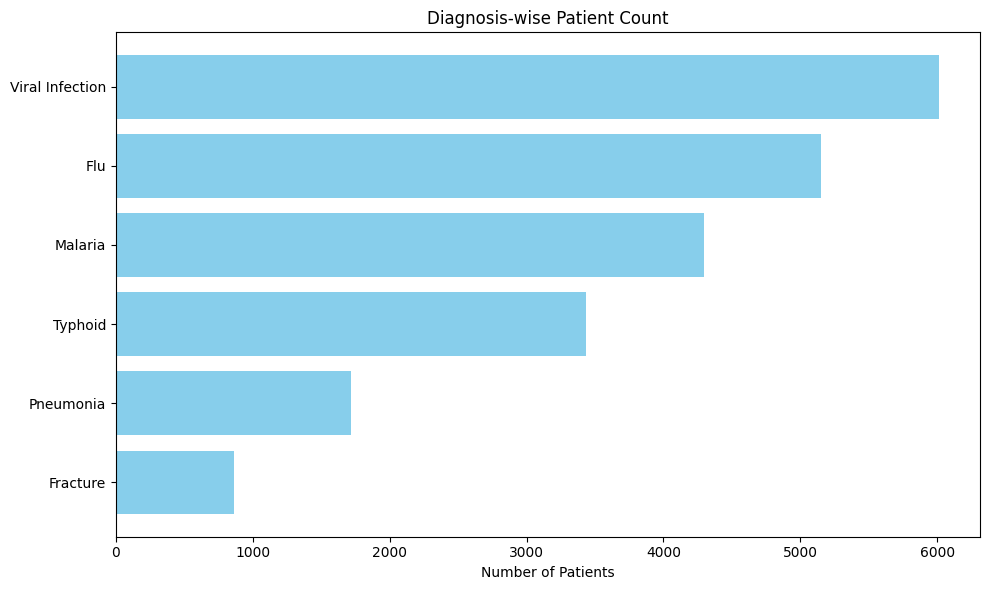

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Diagnosis frequency result 
diagnosis_data = [
    ('Viral Infection', 6012),
    ('Flu', 5151),
    ('Malaria', 4293),
    ('Typhoid', 3435),
    ('Pneumonia', 1719),
    ('Fracture', 861)
]

# DataFrame 
df_diag = pd.DataFrame(diagnosis_data, columns=['Diagnosis', 'Total_Patients'])

# Bar Chart 
plt.figure(figsize=(10, 6))
plt.barh(df_diag['Diagnosis'], df_diag['Total_Patients'], color='skyblue')
plt.xlabel('Number of Patients')
plt.title('Diagnosis-wise Patient Count')
plt.gca().invert_yaxis()  # বড় সংখ্যাটা ওপরের দিকে দেখাতে
plt.tight_layout()
plt.show()


In [20]:
query_bed_occupancy = """
SELECT Bed_Occupancy, COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY Bed_Occupancy
ORDER BY Total_Patients DESC;
"""

cursor.execute(query_bed_occupancy)
bed_data = cursor.fetchall()


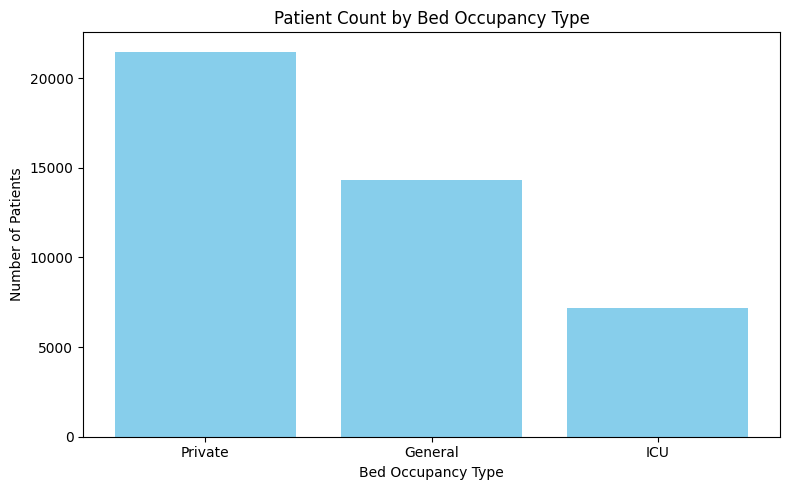

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame 
df_bed = pd.DataFrame(bed_data, columns=['Bed_Occupancy', 'Total_Patients'])

# Chart 
plt.figure(figsize=(8, 5))
plt.bar(df_bed['Bed_Occupancy'], df_bed['Total_Patients'], color='skyblue')
plt.xlabel('Bed Occupancy Type')
plt.ylabel('Number of Patients')
plt.title('Patient Count by Bed Occupancy Type')
plt.tight_layout()
plt.show()


In [22]:
query_doctor_count = """
SELECT Doctor, COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY Doctor
ORDER BY Total_Patients DESC;
"""

cursor.execute(query_doctor_count)
doctor_data = cursor.fetchall()


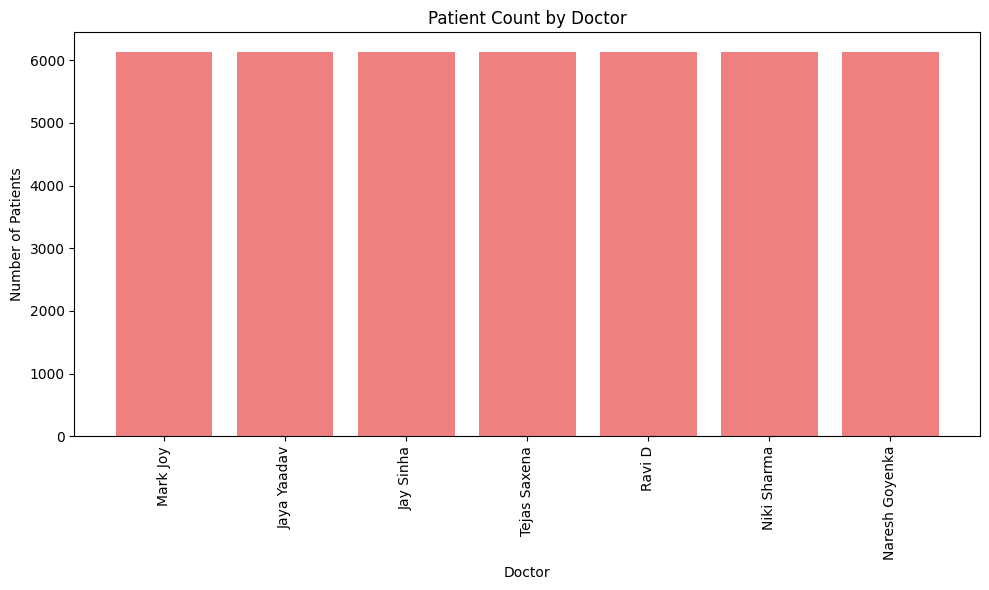

In [23]:
# DataFrame 
df_doctor = pd.DataFrame(doctor_data, columns=['Doctor', 'Total_Patients'])

# Chart
plt.figure(figsize=(10, 6))
plt.bar(df_doctor['Doctor'], df_doctor['Total_Patients'], color='lightcoral')
plt.xlabel('Doctor')
plt.ylabel('Number of Patients')
plt.title('Patient Count by Doctor')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [24]:
query_feedback = """
SELECT Feedback, COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY Feedback
ORDER BY Feedback;
"""

cursor.execute(query_feedback)
feedback_data = cursor.fetchall()


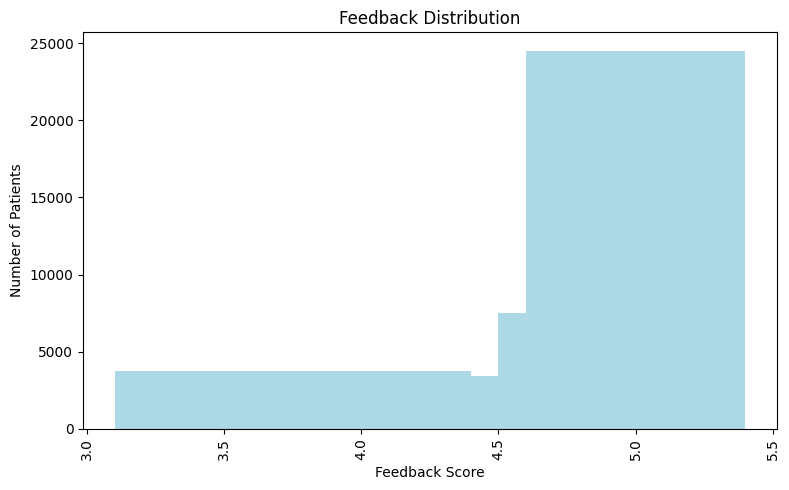

In [25]:
# DataFrame 
df_feedback = pd.DataFrame(feedback_data, columns=['Feedback', 'Total_Patients'])

# Chart 
plt.figure(figsize=(8, 5))
plt.bar(df_feedback['Feedback'], df_feedback['Total_Patients'], color='lightblue')
plt.xlabel('Feedback Score')
plt.ylabel('Number of Patients')
plt.title('Feedback Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
query_billing = """
SELECT [Billing Amount], COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY [Billing Amount]
ORDER BY [Billing Amount];
"""

cursor.execute(query_billing)
billing_data = cursor.fetchall()
for row in billing_data:
    print(row)


(1223, 702)
(1284, 702)
(2245, 228)
(2342, 714)
(2343, 1428)
(3252, 708)
(3424, 1404)
(3434, 702)
(3446, 120)
(3475, 402)
(3545, 120)
(3547, 120)
(3556, 120)
(3658, 348)
(4233, 702)
(4536, 342)
(4566, 120)
(4567, 714)
(4738, 120)
(5435, 702)
(5454, 714)
(5637, 120)
(5674, 396)
(6346, 702)
(6454, 714)
(6473, 342)
(6582, 396)
(6784, 348)
(7462, 396)
(7489, 120)
(7583, 120)
(8394, 702)
(8465, 342)
(8472, 492)
(8732, 702)
(8746, 294)
(8764, 396)
(9285, 60)
(9385, 702)
(10003, 492)
(12241, 492)
(12342, 1470)
(12348, 570)
(12990, 702)
(13234, 486)
(22109, 492)
(23443, 492)
(23444, 486)
(23945, 438)
(24210, 492)
(24435, 486)
(24754, 252)
(24943, 438)
(32421, 486)
(32484, 438)
(33863, 348)
(34352, 480)
(34531, 480)
(34567, 570)
(34784, 252)
(35255, 702)
(35756, 108)
(38899, 438)
(43205, 492)
(43255, 486)
(43432, 492)
(43522, 480)
(45467, 108)
(45676, 108)
(45698, 108)
(45834, 438)
(45837, 438)
(45899, 444)
(47564, 438)
(47689, 570)
(53422, 492)
(53453, 480)
(56743, 432)
(56748, 108)
(56784, 25

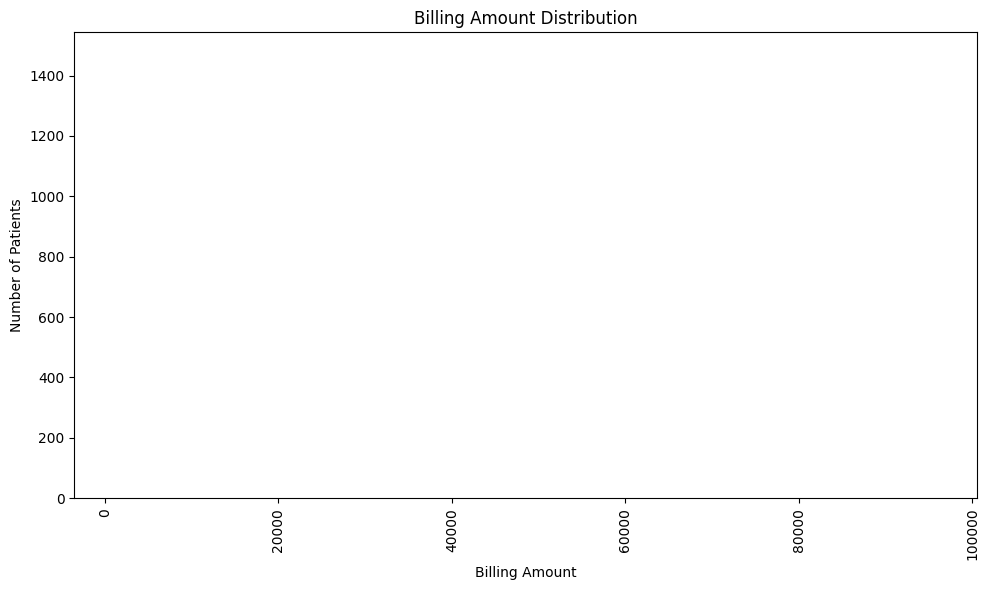

In [27]:
# DataFrame 
df_billing = pd.DataFrame(billing_data, columns=['Billing_Amount', 'Total_Patients'])

# Chart 
plt.figure(figsize=(10, 6))
plt.bar(df_billing['Billing_Amount'], df_billing['Total_Patients'], color='lightgreen')
plt.xlabel('Billing Amount')
plt.ylabel('Number of Patients')
plt.title('Billing Amount Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [28]:
query_health_insurance = """
SELECT [Health Insurance Amount], COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY [Health Insurance Amount]
ORDER BY [Health Insurance Amount];
"""

cursor.execute(query_health_insurance)
insurance_data = cursor.fetchall()

for row in insurance_data:
    print(row)


(1100.7, 702)
(1155.6, 702)
(2020.5, 228)
(2107.8, 714)
(2108.7, 1428)
(2926.8, 708)
(3081.6, 1404)
(3090.6, 702)
(3101.4, 120)
(3127.5, 402)
(3190.5, 120)
(3192.3, 120)
(3200.4, 120)
(3292.2, 348)
(3809.7, 702)
(4082.4, 342)
(4109.4, 120)
(4110.3, 714)
(4264.2, 120)
(4891.5, 702)
(4908.6, 714)
(5073.3, 120)
(5106.6, 396)
(5711.4, 702)
(5808.6, 714)
(5825.7, 342)
(5923.8, 396)
(6105.6, 348)
(6715.8, 396)
(6740.1, 120)
(6824.7, 120)
(7554.6, 702)
(7618.5, 342)
(7624.8, 492)
(7858.8, 702)
(7871.4, 294)
(7887.6, 396)
(8356.5, 60)
(8446.5, 702)
(9002.7, 492)
(11016.9, 492)
(11107.8, 1470)
(11113.2, 570)
(11691.0, 702)
(11910.6, 486)
(19898.1, 492)
(21098.7, 492)
(21099.6, 486)
(21550.5, 438)
(21789.0, 492)
(21991.5, 486)
(22278.6, 252)
(22448.7, 438)
(29178.9, 486)
(29235.6, 438)
(30476.7, 348)
(30916.8, 480)
(31077.9, 480)
(31110.3, 570)
(31305.6, 252)
(31729.5, 702)
(32180.4, 108)
(35009.1, 438)
(38884.5, 492)
(38929.5, 486)
(39088.8, 492)
(39169.8, 480)
(40920.3, 108)
(41108.4, 108)
(41

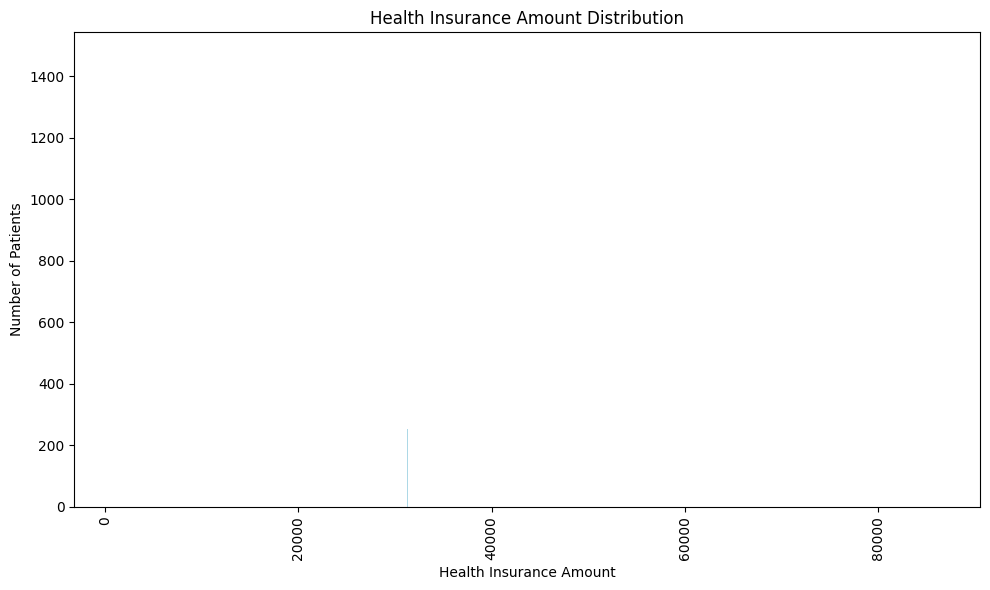

In [29]:
# DataFrame 
df_insurance = pd.DataFrame(insurance_data, columns=['Health_Insurance_Amount', 'Total_Patients'])

# Chart 
plt.figure(figsize=(10, 6))
plt.bar(df_insurance['Health_Insurance_Amount'], df_insurance['Total_Patients'], color='lightblue')
plt.xlabel('Health Insurance Amount')
plt.ylabel('Number of Patients')
plt.title('Health Insurance Amount Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [30]:
query_feedback = """
SELECT Feedback, COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY Feedback
ORDER BY Feedback DESC;
"""

cursor.execute(query_feedback)
feedback_data = cursor.fetchall()


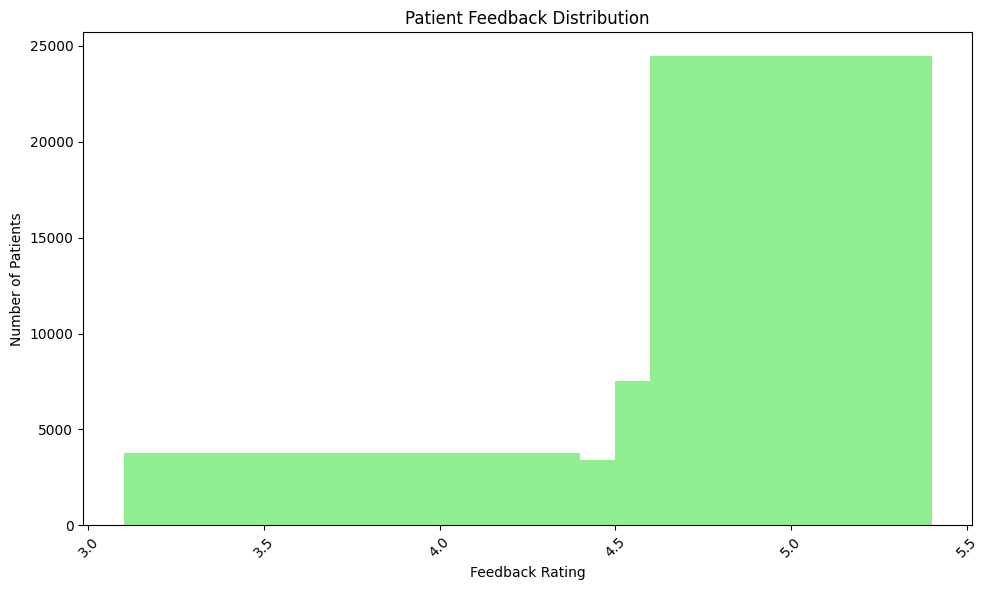

In [31]:
# DataFrame 
df_feedback = pd.DataFrame(feedback_data, columns=['Feedback', 'Total_Patients'])

# Chart 
plt.figure(figsize=(10, 6))
plt.bar(df_feedback['Feedback'], df_feedback['Total_Patients'], color='lightgreen')
plt.xlabel('Feedback Rating')
plt.ylabel('Number of Patients')
plt.title('Patient Feedback Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
query_treatment_type = """
SELECT Test, COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY Test
ORDER BY Total_Patients DESC;
"""

cursor.execute(query_treatment_type)
treatment_data = cursor.fetchall()


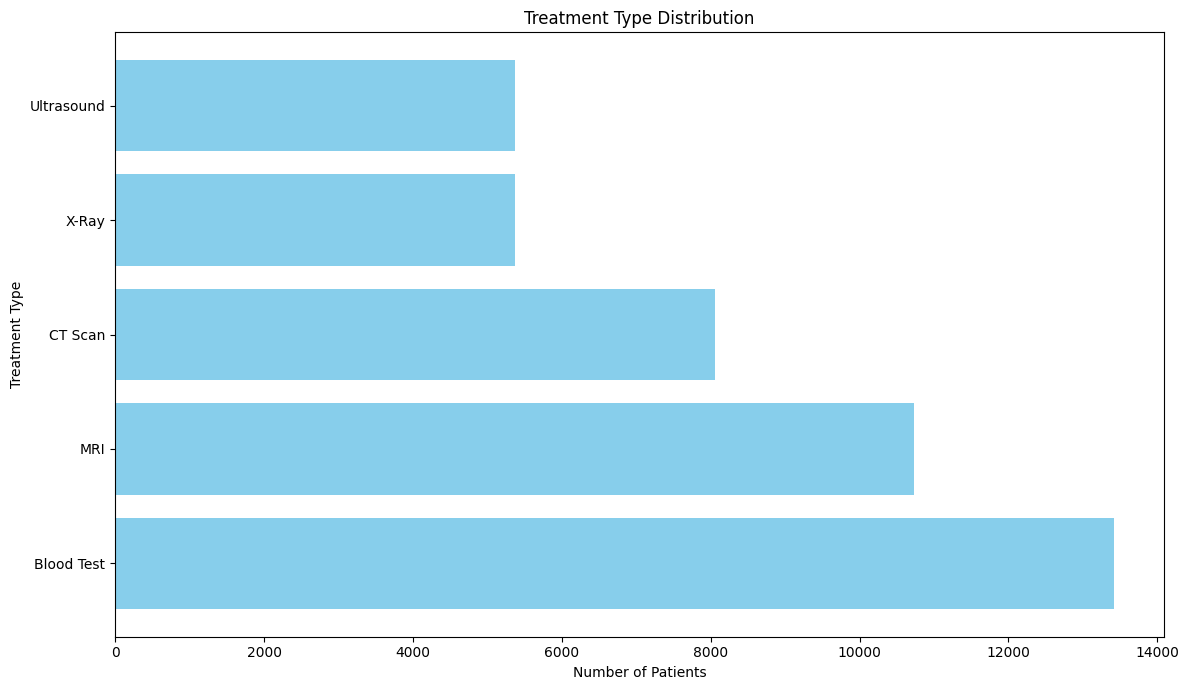

In [33]:
# DataFrame
df_treatment = pd.DataFrame(treatment_data, columns=['Treatment', 'Total_Patients'])

# Chart 
plt.figure(figsize=(12, 7))
plt.barh(df_treatment['Treatment'], df_treatment['Total_Patients'], color='skyblue')
plt.xlabel('Number of Patients')
plt.ylabel('Treatment Type')
plt.title('Treatment Type Distribution')
plt.tight_layout()
plt.show()


In [34]:
query_doctor_distribution = """
SELECT Doctor, COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY Doctor
ORDER BY Total_Patients DESC;
"""

cursor.execute(query_doctor_distribution)
doctor_data = cursor.fetchall()


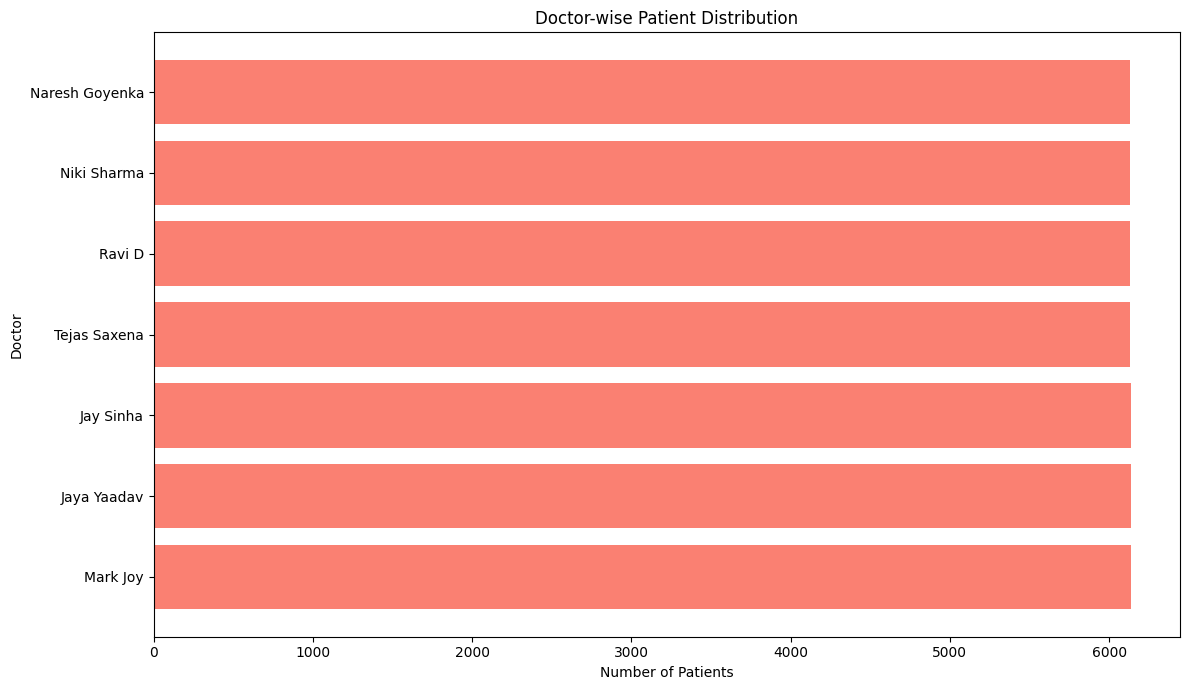

In [35]:
# DataFrame 
df_doctor = pd.DataFrame(doctor_data, columns=['Doctor', 'Total_Patients'])

# Chart 
plt.figure(figsize=(12, 7))
plt.barh(df_doctor['Doctor'], df_doctor['Total_Patients'], color='salmon')
plt.xlabel('Number of Patients')
plt.ylabel('Doctor')
plt.title('Doctor-wise Patient Distribution')
plt.tight_layout()
plt.show()


In [36]:
query_followup_date_distribution = """
SELECT strftime('%Y-%m', [Followup Date]) AS Followup_Month, COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY Followup_Month
ORDER BY Followup_Month;
"""

cursor.execute(query_followup_date_distribution)
followup_data = cursor.fetchall()


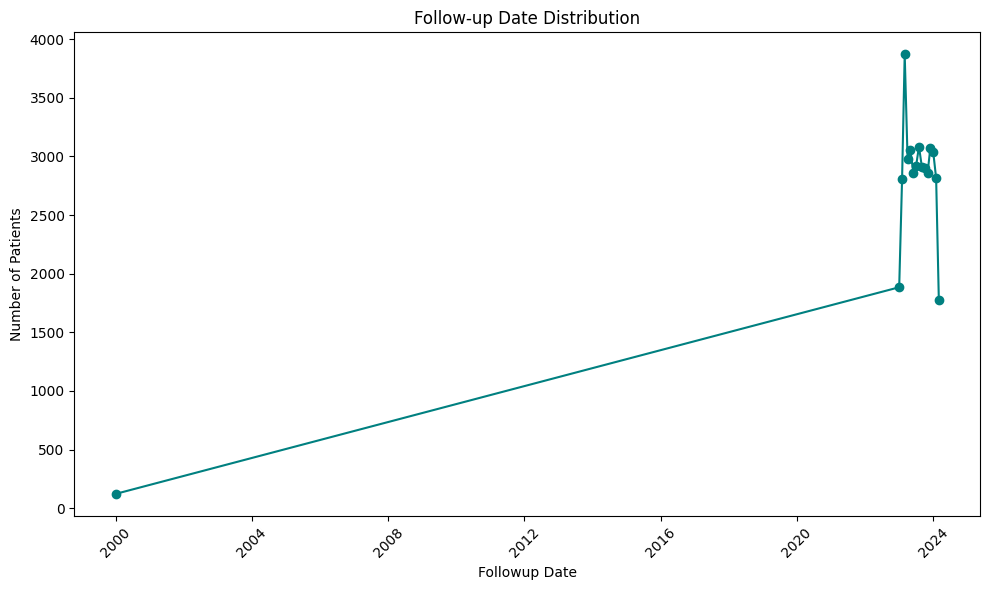

In [37]:
# DataFrame 
df_followup = pd.DataFrame(followup_data, columns=['Followup_Date', 'Total_Patients'])

# Date format conversion
df_followup['Followup_Date'] = pd.to_datetime(df_followup['Followup_Date'])

# Chart 
plt.figure(figsize=(10, 6))
plt.plot(df_followup['Followup_Date'], df_followup['Total_Patients'], marker='o', color='teal')
plt.xlabel('Followup Date')
plt.ylabel('Number of Patients')
plt.title('Follow-up Date Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
query_billing_amount_distribution = """
SELECT [Billing Amount], COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY [Billing Amount]
ORDER BY [Billing Amount];
"""

cursor.execute(query_billing_amount_distribution)
billing_data = cursor.fetchall()


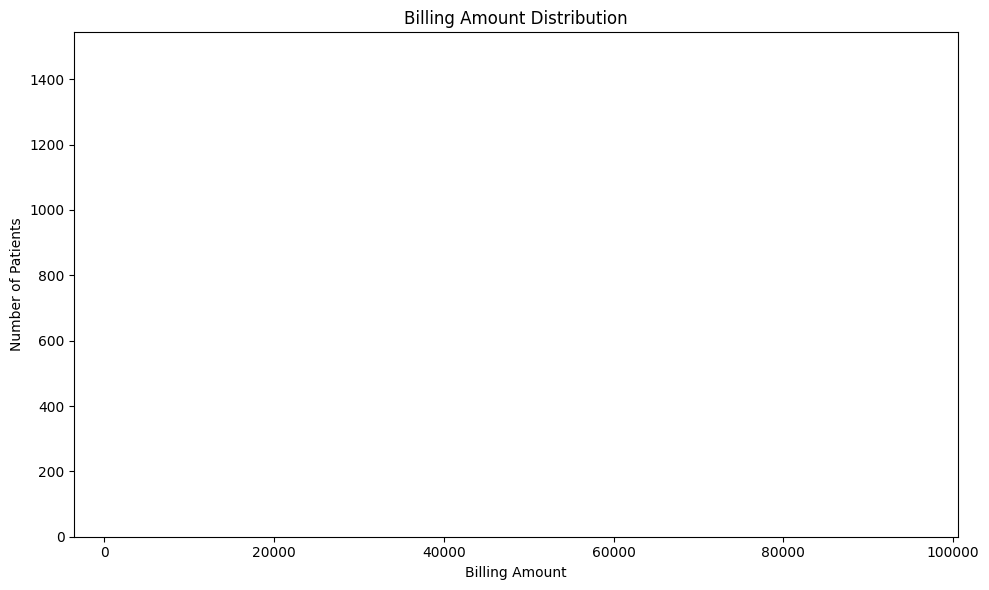

In [39]:
# DataFrame 
df_billing = pd.DataFrame(billing_data, columns=['Billing_Amount', 'Total_Patients'])

# Chart 
plt.figure(figsize=(10, 6))
plt.bar(df_billing['Billing_Amount'], df_billing['Total_Patients'], color='orange')
plt.xlabel('Billing Amount')
plt.ylabel('Number of Patients')
plt.title('Billing Amount Distribution')
plt.tight_layout()
plt.show()


In [40]:
query_health_insurance_amount_distribution = """
SELECT [Health Insurance Amount], COUNT(Patient_ID) AS Total_Patients
FROM healthcare_data
GROUP BY [Health Insurance Amount]
ORDER BY [Health Insurance Amount];
"""

cursor.execute(query_health_insurance_amount_distribution)
health_insurance_data = cursor.fetchall()


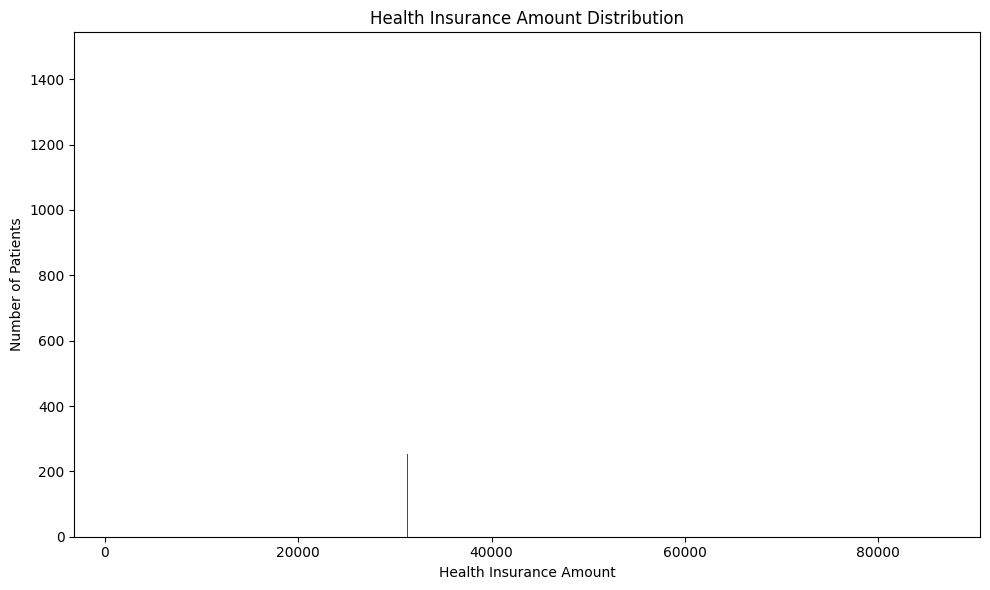

In [41]:
# DataFrame 
df_health_insurance = pd.DataFrame(health_insurance_data, columns=['Health_Insurance_Amount', 'Total_Patients'])

# Chart 
plt.figure(figsize=(10, 6))
plt.bar(df_health_insurance['Health_Insurance_Amount'], df_health_insurance['Total_Patients'], color='green')
plt.xlabel('Health Insurance Amount')
plt.ylabel('Number of Patients')
plt.title('Health Insurance Amount Distribution')
plt.tight_layout()
plt.show()


In [42]:
query_readmission_rate = """
SELECT Patient_ID, COUNT(Patient_ID) AS Admissions
FROM healthcare_data
GROUP BY Patient_ID
HAVING Admissions > 1;
"""

cursor.execute(query_readmission_rate)
readmission_data = cursor.fetchall()


In [43]:
# Readmission rate 
total_patients = len(df)  
readmitted_patients = len(readmission_data)  

readmission_rate = (readmitted_patients / total_patients) * 100
print(f"Readmission Rate: {readmission_rate:.2f}%")


Readmission Rate: 100.00%
